In [3]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

# We are solving for the parameters of 

$$h(x) = \theta_0 + \theta_1 x + \cdots + \theta_2 x^n$$

This is basically like multiple linear regression.

# Class

In [36]:
class PolynomialRegression:
    def __init__(self, n, X, y):
        '''
            n = polynomial degree
            X = mx1 array
            y = target
        '''
        self.n = n
        self.X = np.array([X**ni for ni in range(self.n + 1)]).T # Generates features depending on degree n
        self.y = y # labels
        self.m  = len(X) # number of rows (data points), number of features
        
    # Class Methods
    def fit(self, α=1, max_iter=10**6, tols=10e-8):
        '''
            Looks for the best coefficients given the data using batch gradient descent.
        '''
        # Gradient descent
        θ_old = np.random.rand(self.n+1) # random initial guess
        for i in range(max_iter):
            θ_new = θ_old - α * self.__grad(θ_old)
            
            # Stopping criterion
            if np.linalg.norm(θ_new - θ_old) > tols:
                θ_old = θ_new

            else:
                print("Converged after {} iterations.".format(i))
                break

        # Best Model Coefficients
        self.coef_ = θ_new 
        
        # Compute for the linear regression model's score
        predicted_y = np.array([self.coef_ @ Xi for Xi in self.X]) # predicted y for the X[i] data
        SS_res = np.sum((self.y - predicted_y)**2)    
        SS_tot = np.sum((self.y - self.y.mean())**2)
        self.R2 = 1 - (SS_res/SS_tot) # Model Score
    
    
    def predict(self, X_test):
        X_test = np.array([X_test**ni for ni in range(self.n + 1)]).T
        return np.array([self.coef_ @ X_i for X_i in X_test])

    
    # Private Methods    
    def __h(self, x, θ): # Multiple linear regression model
        return θ @ x
        
    def __grad(self, θ): # Gradient of the cost function
        '''
            Evaluates the gradient of the cost function.
        '''
        
        # Partial derivative of the cost function wrt θ_k stored in the list DJDθ
        DJDθ = np.zeros(self.n + 1)
        for k in range(len(DJDθ)):
            DJDθk = 0
            for i in range(self.m):
                DJDθk += (self.__h(self.X[i], θ) - self.y[i]) * self.X[i,k] # Note that X[0,k] = 1

            DJDθ[k] = (1/self.m) * DJDθk

        return DJDθ

# Test for cubic data

In [61]:
n=3
X = np.arange(-5,5, 0.5)
y = X**n + np.random.normal(0, 7, len(X))

def scaled(x):
    return (x - X_mean) / (X_max - X_min)

def reverse_scale(X_scaled):
    return X_mean + X_scaled * (X_max - X_min)

X_mean = np.mean(X)
X_max = np.max(X)
X_min = np.min(X)

# Apply feature scaling
regtest = PolynomialRegression(n, scaled(X), y)
regtest.fit(1.4)

print(regtest.coef_, regtest.R2)

Converged after 24414 iterations.
[ -1.40066159 -16.77770031 -53.2325647  947.97641838] 0.9754292621398987


### Predict

In [62]:
xs = np.linspace(np.min(X),np.max(X))
ys_predicted = regtest.predict(scaled(xs))

### Plot (unscaled)

<IPython.core.display.Javascript object>


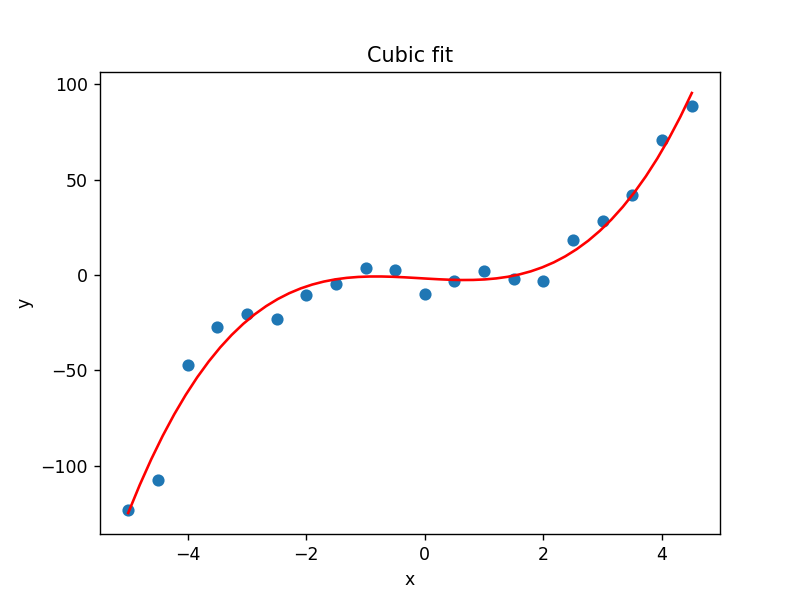

Text(0.5, 1.0, 'Cubic fit')

In [65]:
plt.figure()
plt.scatter(X,y)
plt.plot(xs, ys_predicted, 'red')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Cubic fit")